Author - P D L M Karunanayake

Code block was applied from Code Reuse Session 3 - Question 1

In [3]:
#import library to load and access the dataset
import pandas as pd

Code block was applied from Code Reuse Session 3 - Question 2

In [5]:
#load the classification dataset
data = pd.read_csv('/content/classification_cw_Dataset.csv')

In [6]:
#display data values in the dataset
data.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,0,0,0,0,1,3,1,4.0,1,1,24.0,1,0
1,50.0,0,1,1,2,0,2,1,35.0,1,1,14.0,5,0
2,58.0,0,2,2,4,0,2,1,63.0,1,1,14.0,7,0
3,58.0,0,0,0,0,1,3,1,18.0,1,1,2.0,1,0
4,47.0,0,1,0,1,1,3,1,41.0,1,1,3.0,1,0
5,51.0,0,0,0,0,0,2,1,20.0,1,1,18.0,2,0
6,51.0,0,0,0,0,3,1,1,8.0,1,1,11.0,1,0
7,40.0,0,1,0,1,0,2,1,30.0,1,1,9.0,1,1
8,40.0,0,3,2,4,1,3,1,103.0,1,1,20.0,18,0
9,69.0,0,3,2,4,3,1,0,32.0,1,1,21.0,12,0


Code block was applied from Code Reuse Session 3 - Question 3

In [7]:
#explore the data types in each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4018 non-null   float64
 1   Sex                     4018 non-null   int64  
 2   T_Stage                 4018 non-null   int64  
 3   N_Stage                 4018 non-null   int64  
 4   6th_Stage               4018 non-null   int64  
 5   Differentiated          4018 non-null   int64  
 6   Grade                   4018 non-null   int64  
 7   A_Stage                 4018 non-null   int64  
 8   Tumor_Size              4018 non-null   float64
 9   Estrogen_Status         4018 non-null   int64  
 10  Progesterone_Status     4018 non-null   int64  
 11  Regional_Node_Examined  4018 non-null   float64
 12  Reginol_Node_Positive   4018 non-null   int64  
 13  Mortality_Status        4018 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 4

Code block was applied from Code Reuse Session 3 - Question 5

In [8]:
#initiate input features and target variables
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
X = data[feature_cols]
y = data['Mortality_Status']

Code block was applied from Code Reuse Session 3 - Question 5 & 6

In [10]:
#import a library to perform sample training and test subsets
from sklearn.model_selection import train_test_split

#sample the dataset into training and test subsets with a ratio to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Code block was applied from Tute 7 - 3rd page

In [11]:
#import library to perform Naive Bayes algorithm
from sklearn.naive_bayes import MultinomialNB

#initiate the Naive Bayes algorithm
nb = MultinomialNB()

#fit the model
nb.fit(X_train, y_train)

#make predictions on test data
y_pred = nb.predict(X_test)

#evaluate using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       681
           1       0.29      0.41      0.34       123

    accuracy                           0.76       804
   macro avg       0.59      0.62      0.60       804
weighted avg       0.79      0.76      0.77       804



[[557 124]
 [ 72  51]]


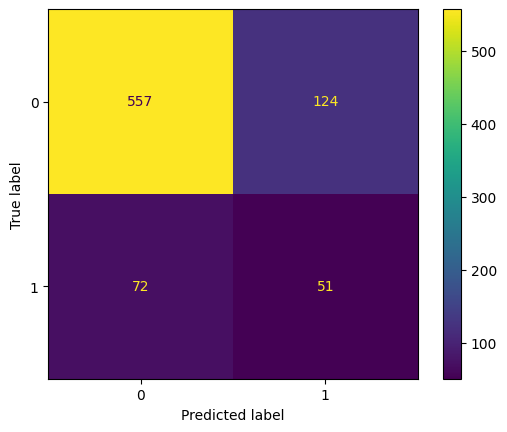

In [12]:
#evaluate using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=nb.classes_)
disp.plot()

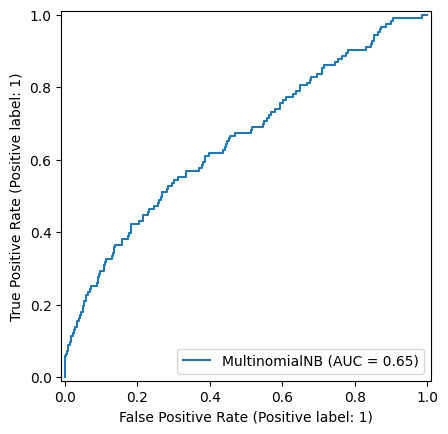

In [13]:
#evaluate using AUC-ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(nb, X_test, y_test)

Code block was applied from Tute 7 -4th p;age

Classification report of LR
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       681
           1       0.78      0.17      0.28       123

    accuracy                           0.87       804
   macro avg       0.82      0.58      0.60       804
weighted avg       0.85      0.87      0.83       804

Confusion matrix of LR


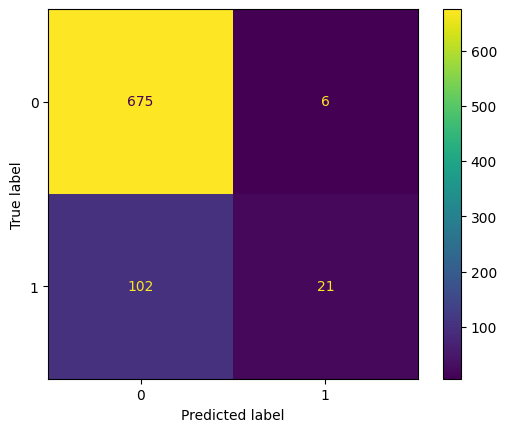

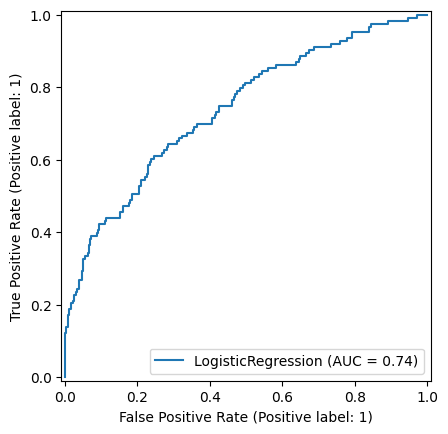

In [14]:
# importing the library
from sklearn.linear_model import LogisticRegression

# creating a model
lr = LogisticRegression(max_iter=4000)

# fitting the model
lr.fit(X_train, y_train)

# making predictions
y_pred = lr.predict(X_test)

# evaluating using the classification report

# printing it
print("Classification report of LR")
print(classification_report(y_test, y_pred))

# evaluating using Confusion matrix

# printing it
print("Confusion matrix of LR")
lr_cm = confusion_matrix(y_test, y_pred)
# plotting it
disp=ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr.classes_)
disp.plot()

# AUC-ROC
RocCurveDisplay.from_estimator(lr, X_test, y_test)

Code block was applied from Tute 7 - 6-7 Pages

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       681
           1       0.32      0.37      0.34       123

    accuracy                           0.78       804
   macro avg       0.60      0.62      0.61       804
weighted avg       0.80      0.78      0.79       804



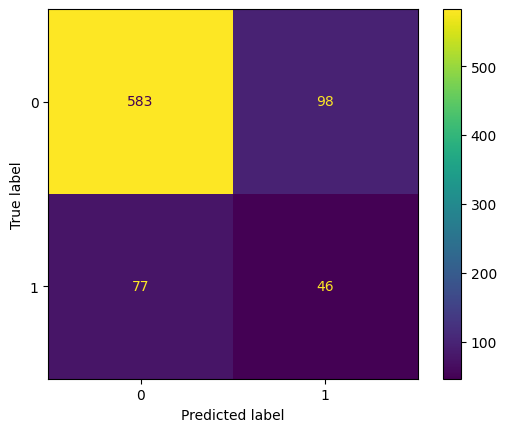

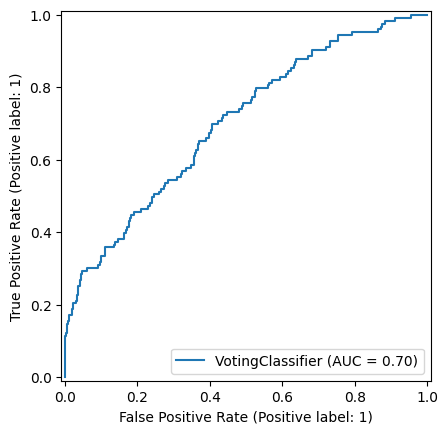

In [15]:
#initiate new ensemble model
from sklearn.ensemble import VotingClassifier

#create a new discitionary for base learners
base_learners = [
    ('NB', nb),
    ('LR', lr)
]

#initiate the voting classifier
vc = VotingClassifier(base_learners, voting='soft')

#fit the model
vc=vc.fit(X_train, y_train)

#make predictions on test data
y_pred = vc.predict(X_test)

#evaluate using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#create a confustion metrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ensembel_learner=(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=ensembel_learner, display_labels=vc.classes_)
disp.plot()

#create the AUC-ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(vc, X_test, y_test)

Code block was applied from Code Reuse Session 3 - Question 2

In [17]:
#load the regression dataset
data = pd.read_csv('/content/regression_cw_dataset.csv')

#display the data values in dataset
data.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,40.0,0,1,0,1,0,2,1,30.0,1,1,9.0,1,14,1
1,68.0,0,0,0,0,0,2,1,13.0,1,1,9.0,1,64,1
2,57.0,0,2,2,4,0,2,1,70.0,1,1,12.0,12,42,1
3,42.0,0,0,2,4,0,2,1,9.0,0,0,15.0,2,39,1
4,67.0,0,0,0,0,0,2,1,13.0,1,1,16.0,3,60,1
5,31.0,0,2,2,4,1,3,1,70.0,1,1,23.0,23,44,1
6,64.0,0,1,2,4,1,3,1,34.0,1,0,24.0,20,12,1
7,53.0,0,2,0,2,1,3,1,60.0,1,1,8.0,1,91,1
8,63.0,0,1,1,2,3,1,1,26.0,1,1,5.0,4,87,1
9,45.0,0,1,2,4,1,3,1,25.0,1,1,21.0,16,40,1


Code block was applied from Code Reuse Session 3 - Question 3

In [18]:
#explore data types in each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     615 non-null    float64
 1   Sex                     615 non-null    int64  
 2   T_Stage                 615 non-null    int64  
 3   N_Stage                 615 non-null    int64  
 4   6th_Stage               615 non-null    int64  
 5   Differentiated          615 non-null    int64  
 6   Grade                   615 non-null    int64  
 7   A_Stage                 615 non-null    int64  
 8   Tumor_Size              615 non-null    float64
 9   Estrogen_Status         615 non-null    int64  
 10  Progesterone_Status     615 non-null    int64  
 11  Regional_Node_Examined  615 non-null    float64
 12  Reginol_Node_Positive   615 non-null    int64  
 13  Survival_Months         615 non-null    int64  
 14  Mortality_Status        615 non-null    in

Code block was applied from Code Reuse Session 3 - Question 4

In [19]:
#declare input variables and target variables
x=data.drop(['Survival_Months'],axis=1)
y=data[['Survival_Months']]

Code block was applied from Code Reuse Session 3 - Question 6

In [20]:
#check the shape of x and y
print(x.shape)
print(y.shape)

(615, 14)
(615, 1)


Code block was applied from Code Reuse Session 3 - Question 5

In [21]:
#sample the dataset into test and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)

Code block was applied from Code Reuse Session 3 - Question 6 & 7

In [22]:
#import a library to predict survival months using decision tree regressor
from sklearn.tree import DecisionTreeRegressor

#initiate the decision tree regressor
dt=DecisionTreeRegressor()

#fit the model
dt.fit(x_train,y_train)

DecisionTreeRegressor()

Code block was applied from Code Reuse Session 3 - Question 8

In [23]:
#make predictions on test data
y_pred=dt.predict(x_test)

Code block was applied from Tute 6 - 4th page

In [24]:
#find the depth of decision trees
dt.get_depth()

19

Code block was applied from Code Reuse Session 3 - Question 10

In [25]:
#import a library to plot the tree
from sklearn import tree
from matplotlib import pyplot as plt

Code block was applied from Code Reuse Session 3 - Question 11

In [26]:
#plot the decision tree model for suvival months
fig=plt.figure(figsize=(150,150))
tree.plot_tree(dt,filled=True, feature_names=list(x.columns))

Output hidden; open in https://colab.research.google.com to view.

Code block was applied from Code Reuse Session 3 - Question 12

In [27]:
#save the tree as an image
fig.savefig('tree.png')

Code block was applied from Tute 6 - 19th page

In [33]:
#pruning the tree to 4 levels
pruned_dt=DecisionTreeRegressor(max_depth=4)
pruned_dt.fit(x_train,y_train)

#make predictions on test set
y_pred_pruned=pruned_dt.predict(x_test)

[Text(0.5, 0.9, 'Estrogen_Status <= 0.5\nsquared_error = 521.8\nsamples = 369\nvalue = 44.512'),
 Text(0.25, 0.7, 'Regional_Node_Examined <= 15.5\nsquared_error = 438.54\nsamples = 67\nvalue = 31.239'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Regional_Node_Examined <= 14.5\nsquared_error = 578.083\nsamples = 36\nvalue = 35.472'),
 Text(0.0625, 0.3, 'Tumor_Size <= 31.5\nsquared_error = 460.937\nsamples = 29\nvalue = 31.448'),
 Text(0.03125, 0.1, 'squared_error = 58.0\nsamples = 9\nvalue = 18.0'),
 Text(0.09375, 0.1, 'squared_error = 524.25\nsamples = 20\nvalue = 37.5'),
 Text(0.1875, 0.3, 'Age <= 49.0\nsquared_error = 718.408\nsamples = 7\nvalue = 52.143'),
 Text(0.15625, 0.1, 'squared_error = 680.222\nsamples = 3\nvalue = 75.333'),
 Text(0.21875, 0.1, 'squared_error = 41.188\nsamples = 4\nvalue = 34.75'),
 Text(0.375, 0.5, 'Reginol_Node_Positive <= 16.5\nsquared_error = 231.509\nsamples = 31\nvalue = 26.323'),
 Text(0.3125, 0.3, 'N_Stage <= 0.5\nsquared_error = 136.571\nsamples

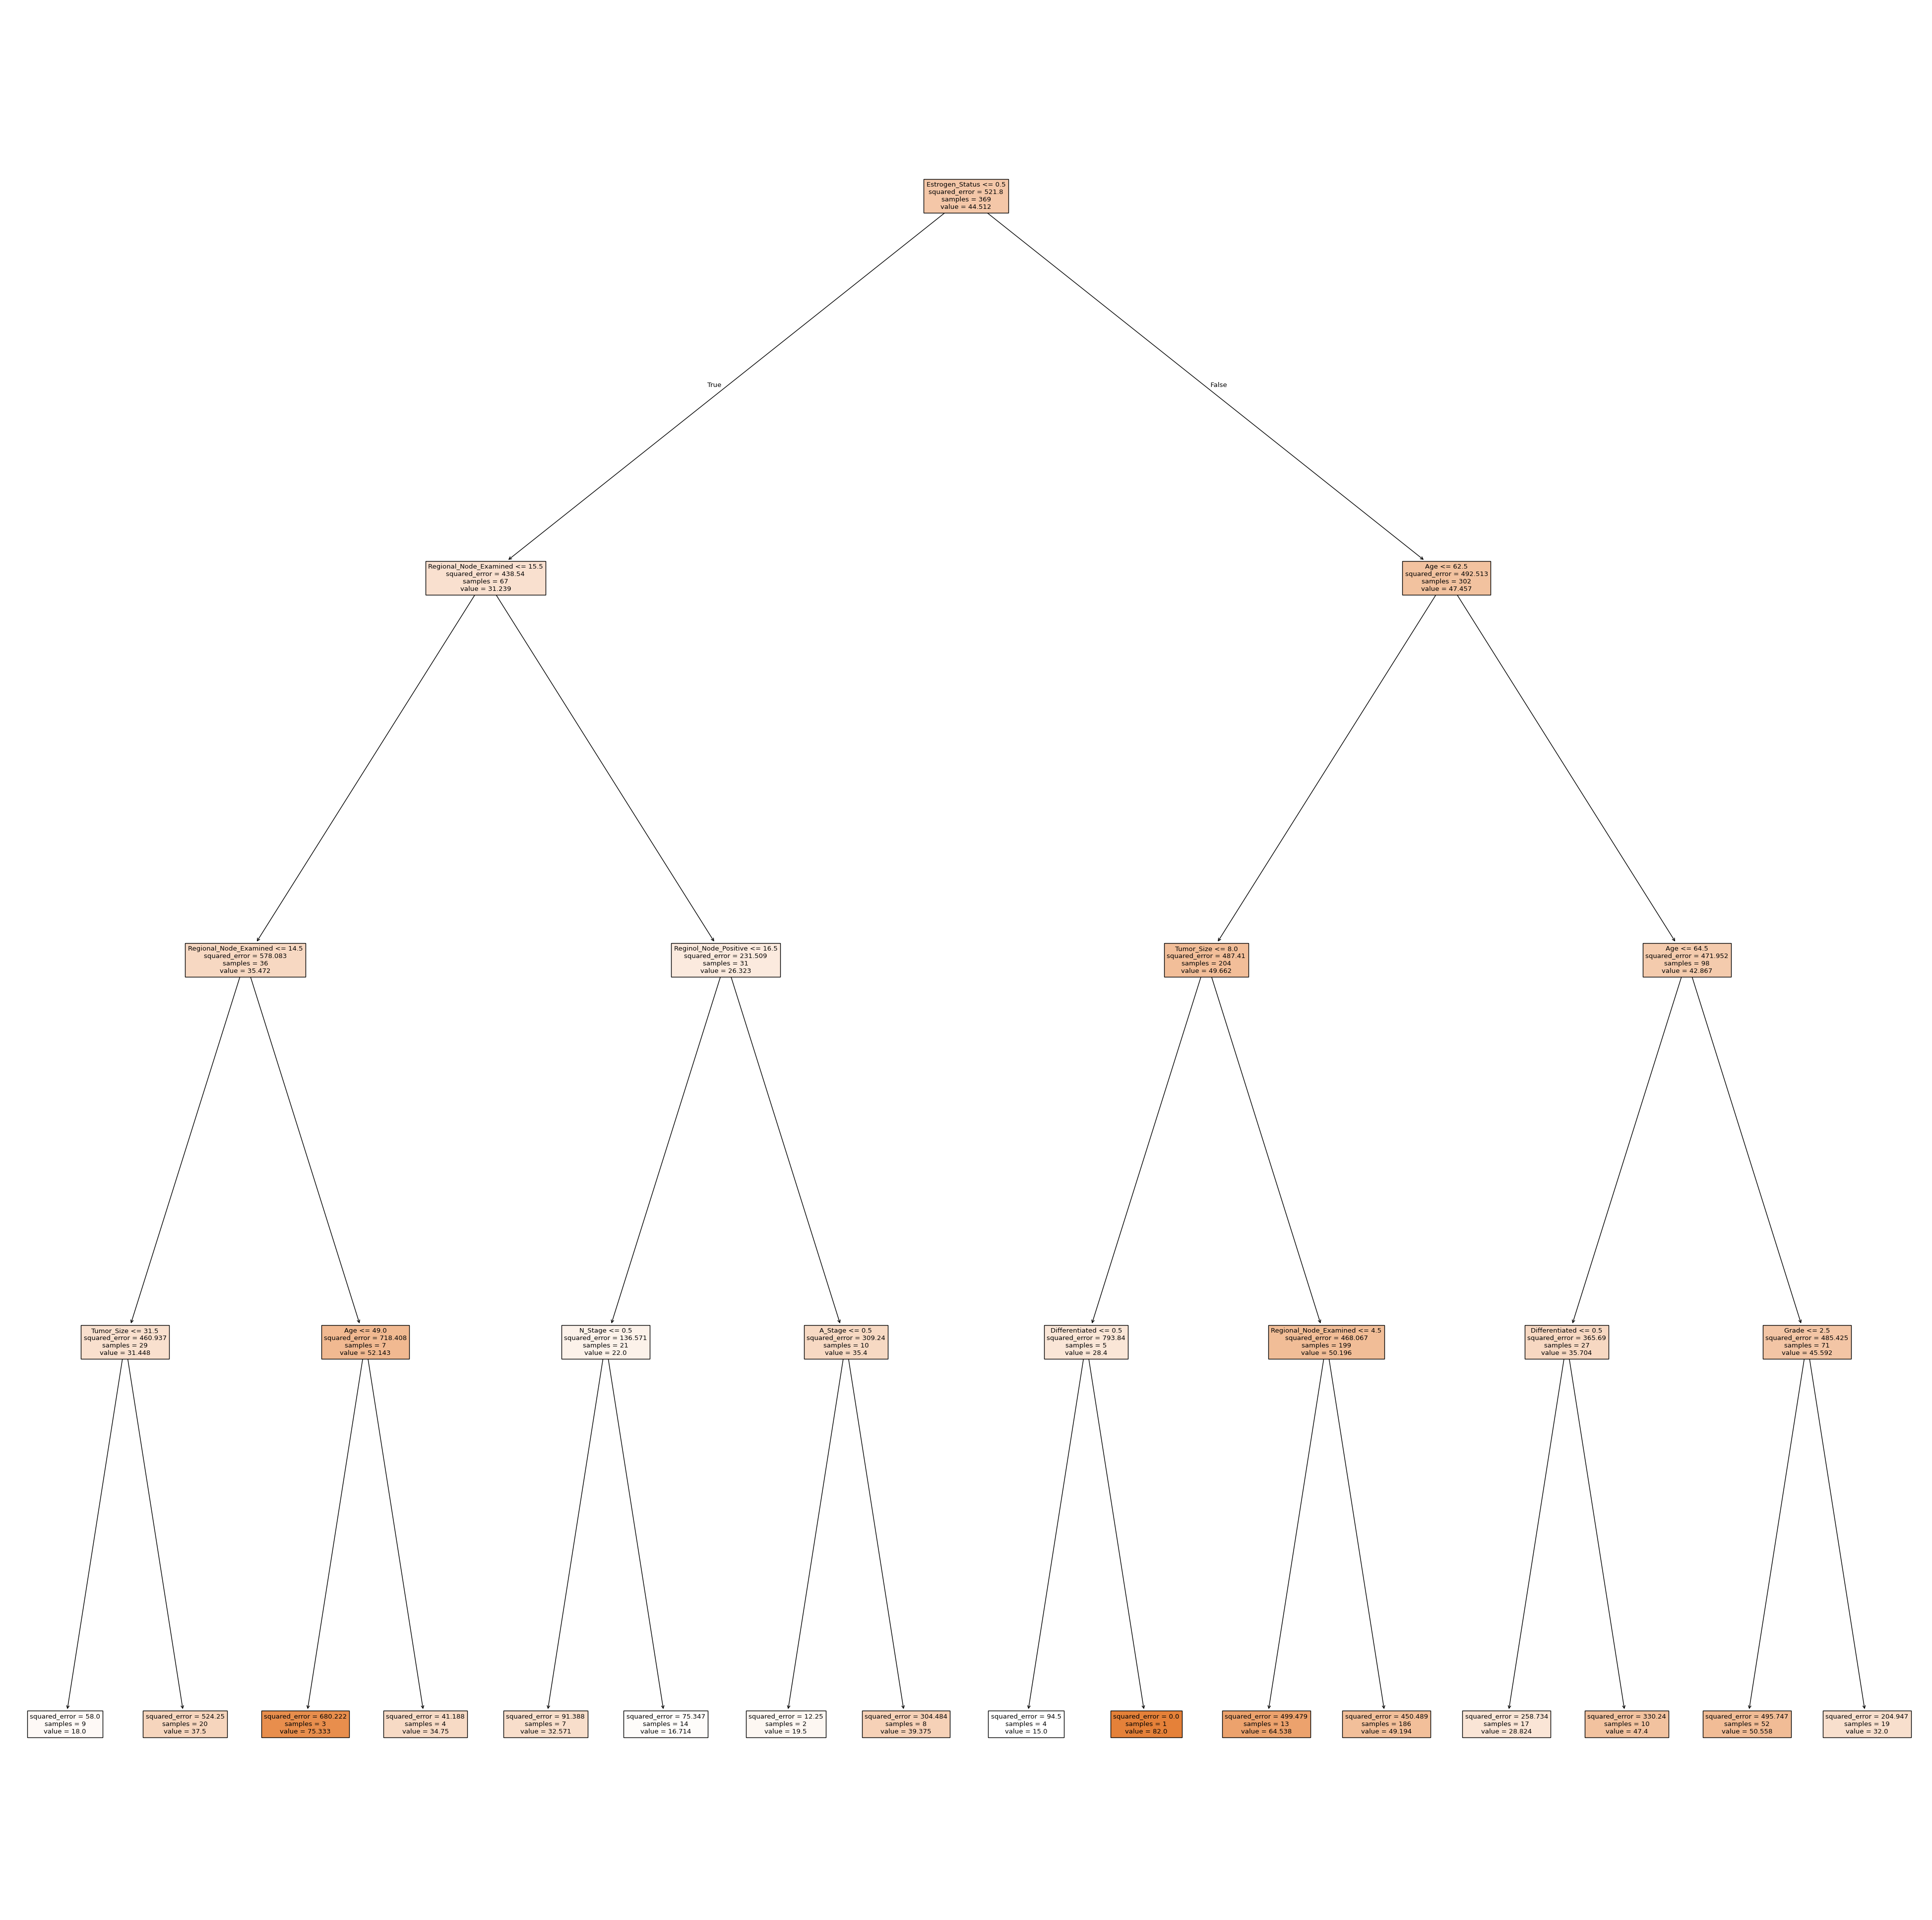

In [34]:
#plot the pruned decision tree
pt_fig=plt.figure(figsize=(50,50))
tree.plot_tree(pruned_dt,filled=True, feature_names=list(x.columns))

Code block was applied from Tute 6 - 19th page

In [35]:
#save the pruned decision tree
pt_fig.savefig('pruned_tree.png')

Code block was applied from Tute 6 - 20th pags

In [36]:
#import libraries to assess how well the model predicts the survival months
from sklearn import metrics
import numpy as np

In [40]:
#apply the metrics methods

#MSE
print('MSE:',metrics.mean_squared_error(y_test,y_pred))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#r2 score
print('r2 score:',metrics.r2_score(y_test,y_pred))

#MAE
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

MSE: 686.6705250787769
RMSE: 26.204398964272713
r2 score: -0.05881560273135977
MAE: 21.30401000461513


In [41]:
#calculate for pruned regression decision tree

#MAE
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_pruned))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,y_pred_pruned))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_pruned)))

#r2 score
print('r2 score:',metrics.r2_score(y_test,y_pred_pruned))

MAE: 21.1617335818509
MSE: 677.1380047535736
RMSE: 26.02187550415176
r2 score: -0.044116877673194166


In [43]:
#use hyperparameter tune with GridSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

#initiate a new decision tree
regressor=DecisionTreeRegressor()

#create a dictionary to test values
param_grid = {'max_depth': np.arange(1, 22), 'criterion': ['squared_error'], 'splitter':['best', 'random']}

#use gridsearch to test values
regressor_cv = GridSearchCV(regressor, param_grid, cv=5, scoring='r2')

#fit the model
regressor_cv.fit(x_train, y_train)

#get the best parameters
regressor_cv.best_params_


{'criterion': 'squared_error', 'max_depth': np.int64(1), 'splitter': 'best'}

In [46]:
#create a new DR with new parametrs
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=np.int64(2), splitter='random')

#fit the model
regressor.fit(x_train, y_train)

#predict the response
y_pred_optimal = regressor.predict(x_test)

#new MAE
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_optimal))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,y_pred_optimal))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_optimal)))

#R2 Score
print('r2 score:',metrics.r2_score(y_test,y_pred_optimal))

MAE: 20.289057350032962
MSE: 617.7376831346838
RMSE: 24.854329263423782
r2 score: 0.04747579310603567


In [47]:
#predict survival months of a cancer patient using pruned DT

patient_data = pd.DataFrame([{
    'Age':32,
    'Sex':0,
    'T_Stage':2,
    'N_Stage':0,
    '6th_Stage':4,
    'Differentiated':0,
    'Grade':1,
    'A_Stage':1,
    'Tumor_Size':45,
    'Estrogen_Status':0,
    'Progesterone_Status':1,
    'Regional_Node_Examined':7,
    'Reginol_Node_Positive':1
}], columns = x_train.columns)

#predict months using pruned tree
predicted_months = pruned_dt.predict(patient_data)
print(predicted_months)


[37.5]
